# SeFa

## Installation

In [1]:
!git clone https://github.com/rosinality/stylegan2-pytorch
!pip install ninja

Cloning into 'stylegan2-pytorch'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 395 (delta 0), reused 1 (delta 0), pack-reused 392
Receiving objects: 100% (395/395), 122.52 MiB | 30.16 MiB/s, done.
Resolving deltas: 100% (200/200), done.
     |████████████████████████████████| 108 kB 5.4 MB/s 


## Setup

### Convert weights (Optional)
Convert pretrained weights from TensorFlow (.pkl) to PyTorch (.pt) format

In [ ]:
# Download pretrained .pkl model
# !gdown --id 1kD6lSg5Hx8COrzrmaVxbEFqLgdxzm8pt 

In [ ]:
# !git clone https://github.com/dvschultz/stylegan2-ada-pytorch/
# %cd /content/stylegan2-ada-pytorch/

In [ ]:
# !python export_weights.py /content/network-snapshot-010483.pkl /content/network-snapshot-010483.pt

### Download converted weights

In [2]:
# Download converted pretrained StyleGAN2-ADA model (pizza10)
!gdown --id 1Chk0SSmDKaUPgeG3Inu1vMLUAWla-wYS

Downloading...
From: https://drive.google.com/uc?id=1Chk0SSmDKaUPgeG3Inu1vMLUAWla-wYS
To: /content/network-snapshot-010483.pt
100% 99.8M/99.8M [00:00<00:00, 150MB/s]


## Run SeFa!

In [3]:
%cd /content/stylegan2-pytorch/

/content/stylegan2-pytorch


Generate random samples using pretrained model weights

In [ ]:
!python generate.py --size 256 --pics 5 --ckpt /content/network-snapshot-010483.pt --channel_multiplier 1 --truncation 0.5

  0% 0/5 [00:00<?, ?it/s]/content/stylegan2-pytorch/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.10.0+cu111. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100% 5/5 [00:00<00:00, 11.00it/s]


Discover meaningful latent semantic factor or directions in an unsupervised manner

First, you need to extract eigenvectors of weight matrices using `closed_form_factorization.py`


> `python closed_form_factorization.py [CHECKPOINT]`


This will create factor file that contains eigenvectors (Default: factor.pt)

In [4]:
!python closed_form_factorization.py /content/network-snapshot-010483.pt

Test the meaning of extracted directions


> `python apply_factor.py -i [INDEX_OF_EIGENVECTOR] -d [DEGREE_OF_MOVE] -n [NUMBER_OF_SAMPLES] --ckpt [CHECKPOINT] [FACTOR_FILE]`


For example,


> `python apply_factor.py -i 19 -d 5 -n 10 --ckpt [CHECKPOINT] factor.pt`


This will generate 10 random samples, and samples generated from latents that moved along 17th eigenvector with size/degree +-5 (Top row: +5, Middle row: Orignal, Bottom row: -5)

In [15]:
!python apply_factor.py -i 40 -d 5 -n 10 --ckpt /content/network-snapshot-010483.pt factor.pt --channel_multiplier 1 --truncation 0.5

/content/stylegan2-pytorch/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.10.0+cu111. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


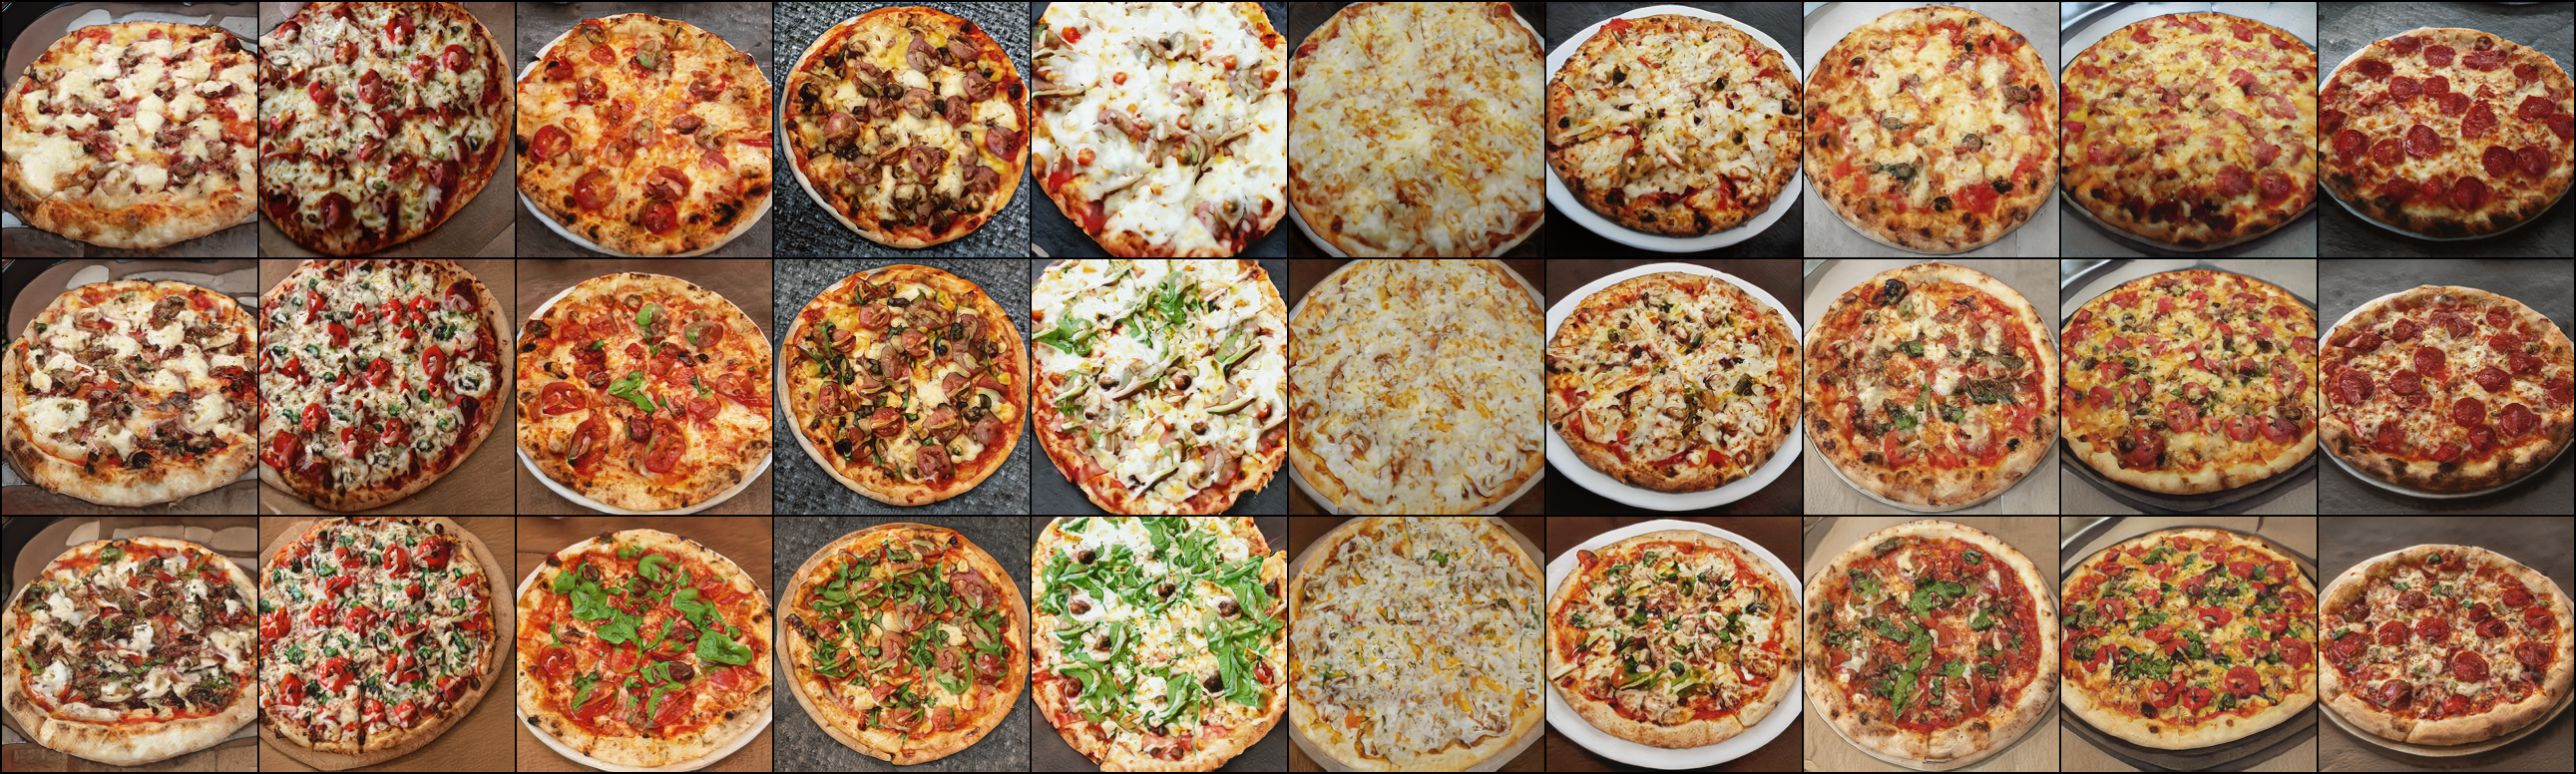

In [6]:
# Display generated images
from IPython.display import Image
Image('/content/stylegan2-pytorch/factor_index-17_degree-5.0.png')